In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [11]:
data = pd.read_csv("../dataset/dataset.csv")

In [12]:
data=data.drop(columns='Unnamed: 0')
data.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_date,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Time_taken_(min)
0,0x9012,RANCHIRES09DEL02,36.0,4.5,23.351058,85.325731,23.371058,85.345731,24-03-2022,11:25,11:35,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,25.0
1,0xb201,BANGRES11DEL03,37.0,4.7,12.934365,77.616155,13.024365,77.706155,25-03-2022,17:40,17:50,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,40.0
2,0xa657,VADRES06DEL01,25.0,4.9,22.312790,73.170283,22.352790,73.210283,19-03-2022,13:40,13:55,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,30.0
3,0xab15,HYDRES05DEL02,28.0,4.5,17.433809,78.386744,17.563809,78.516744,10-03-2022,23:35,23:45,Sandstorms,Low,1,Drinks,motorcycle,0.0,No,Metropolitian,11.0
4,0x5be6,MYSRES13DEL02,22.0,4.5,12.310972,76.659264,12.390972,76.739264,10-03-2022,20:40,20:55,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,47.0
5,0x9fc4,MUMRES07DEL01,37.0,4.8,19.091458,72.827808,19.101458,72.837808,03-04-2022,10:45,10:50,Sunny,Low,1,Meal,scooter,0.0,No,Urban,19.0
6,0xc1c1,BHPRES15DEL01,21.0,4.8,23.234249,77.434007,23.244249,77.444007,15-02-2022,9:40,9:45,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,15.0
7,0xd7e3,GOARES09DEL02,35.0,4.2,15.303897,73.914336,15.323897,73.934336,13-02-2022,8:30,8:35,Windy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,31.0
8,0xcb5a,KOLRES01DEL02,34.0,4.5,22.514688,88.393294,22.564688,88.443294,11-02-2022,18:35,18:40,Fog,Medium,2,Drinks,electric_scooter,1.0,No,Urban,18.0
9,0xa475,JAPRES06DEL02,22.0,5.0,26.911927,75.797282,26.931927,75.817282,01-04-2022,8:20,8:35,Fog,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20.0


In [13]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

ID : ['0x9012' '0xb201' '0xa657' ... '0xda5f' '0xdea0' '0x1917']
Delivery_person_ID : ['RANCHIRES09DEL02' 'BANGRES11DEL03' 'VADRES06DEL01' ... 'LUDHRES07DEL02'
 'ALHRES13DEL01' 'DEHRES02DEL01']
Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 29. 24.
 23. nan 20. 15. 50.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 nan 3.9 3.6 3.5 2.9
 1.  3.3 2.6 3.2 6.  2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [ 23.351058  12.934365  22.31279   17.433809  12.310972  19.091458
  23.234249  15.303897  22.514688  26.911927  13.064181  22.753659
   0.        19.874449  22.308096  12.284747  13.049645  19.131141
  22.761226  26.892312  27.160934  11.006686  17.431477  13.045479
  26.47775   17.422819  26.492106  21.173343  22.727021  22.725748
  23.357804  23.353783  18.530963  22.552996  12.914264  21.170798
  12.972532  15.496162  11.024839  22.311358  22.311603  26.473698
  26.90519   17.45971   19.055831  22.75004   26.4716

In [14]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Time_taken_(min)'],
      dtype='object')

In [15]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['ID', 'Delivery_person_ID', 'Order_date', 'Time_order',
       'Time_order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [16]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze.html', open_browser=True)

d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [17]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Multiple_deliveries,Time_taken_(min)
count,43738.000000,43684.000000,45592.000000,45592.000000,45592.000000,45592.000000,45592.000000,44599.000000,45592.000000
mean,29.566967,4.633774,17.017603,70.231208,17.465070,70.845591,1.023337,0.744680,26.294657
std,5.815113,0.334718,8.185155,22.883883,7.335160,21.119030,0.839062,0.572469,9.383903
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [18]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
ID: 0x9012
Delivery_person_ID: JAPRES11DEL02
Delivery_person_Age: 35.0
Delivery_person_ratings: 4.8
Restaurant_latitude: 0.0
Restaurant_longitude: 0.0
Delivery_location_latitude: 0.13
Delivery_location_longitude: 0.13
Order_date: 15-03-2022
Time_order: nan
Time_order_picked: 21:30
Weather_conditions: Fog
Road_traffic_density: Low
Vehicle_condition: 2
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Time_taken_(min): 26.0


In [19]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 30.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 18.546947
Restaurant_longitude: 75.898497
Delivery_location_latitude: 18.633934
Delivery_location_longitude: 76.002574
Vehicle_condition: 1.0
Multiple_deliveries: 1.0
Time_taken_(min): 26.0


In [20]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.566966939503406
Delivery_person_ratings: 4.633774379635565
Restaurant_latitude: 17.01760288535269
Restaurant_longitude: 70.2312081685164
Delivery_location_latitude: 17.465069619626252
Delivery_location_longitude: 70.84559112282857
Vehicle_condition: 1.0233374276188805
Multiple_deliveries: 0.744680373999417
Time_taken_(min): 26.29465695736094


Dispersion (Độ phân tán):

In [21]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age             5.815113
Delivery_person_ratings         0.334718
Restaurant_latitude             8.185155
Restaurant_longitude           22.883883
Delivery_location_latitude      7.335160
Delivery_location_longitude    21.119030
Vehicle_condition               0.839062
Multiple_deliveries             0.572469
Time_taken_(min)                9.383903
dtype: float64

In [22]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age             33.815542
Delivery_person_ratings          0.112036
Restaurant_latitude             66.996759
Restaurant_longitude           523.672093
Delivery_location_latitude      53.804579
Delivery_location_longitude    446.013435
Vehicle_condition                0.704024
Multiple_deliveries              0.327720
Time_taken_(min)                88.057634
dtype: float64

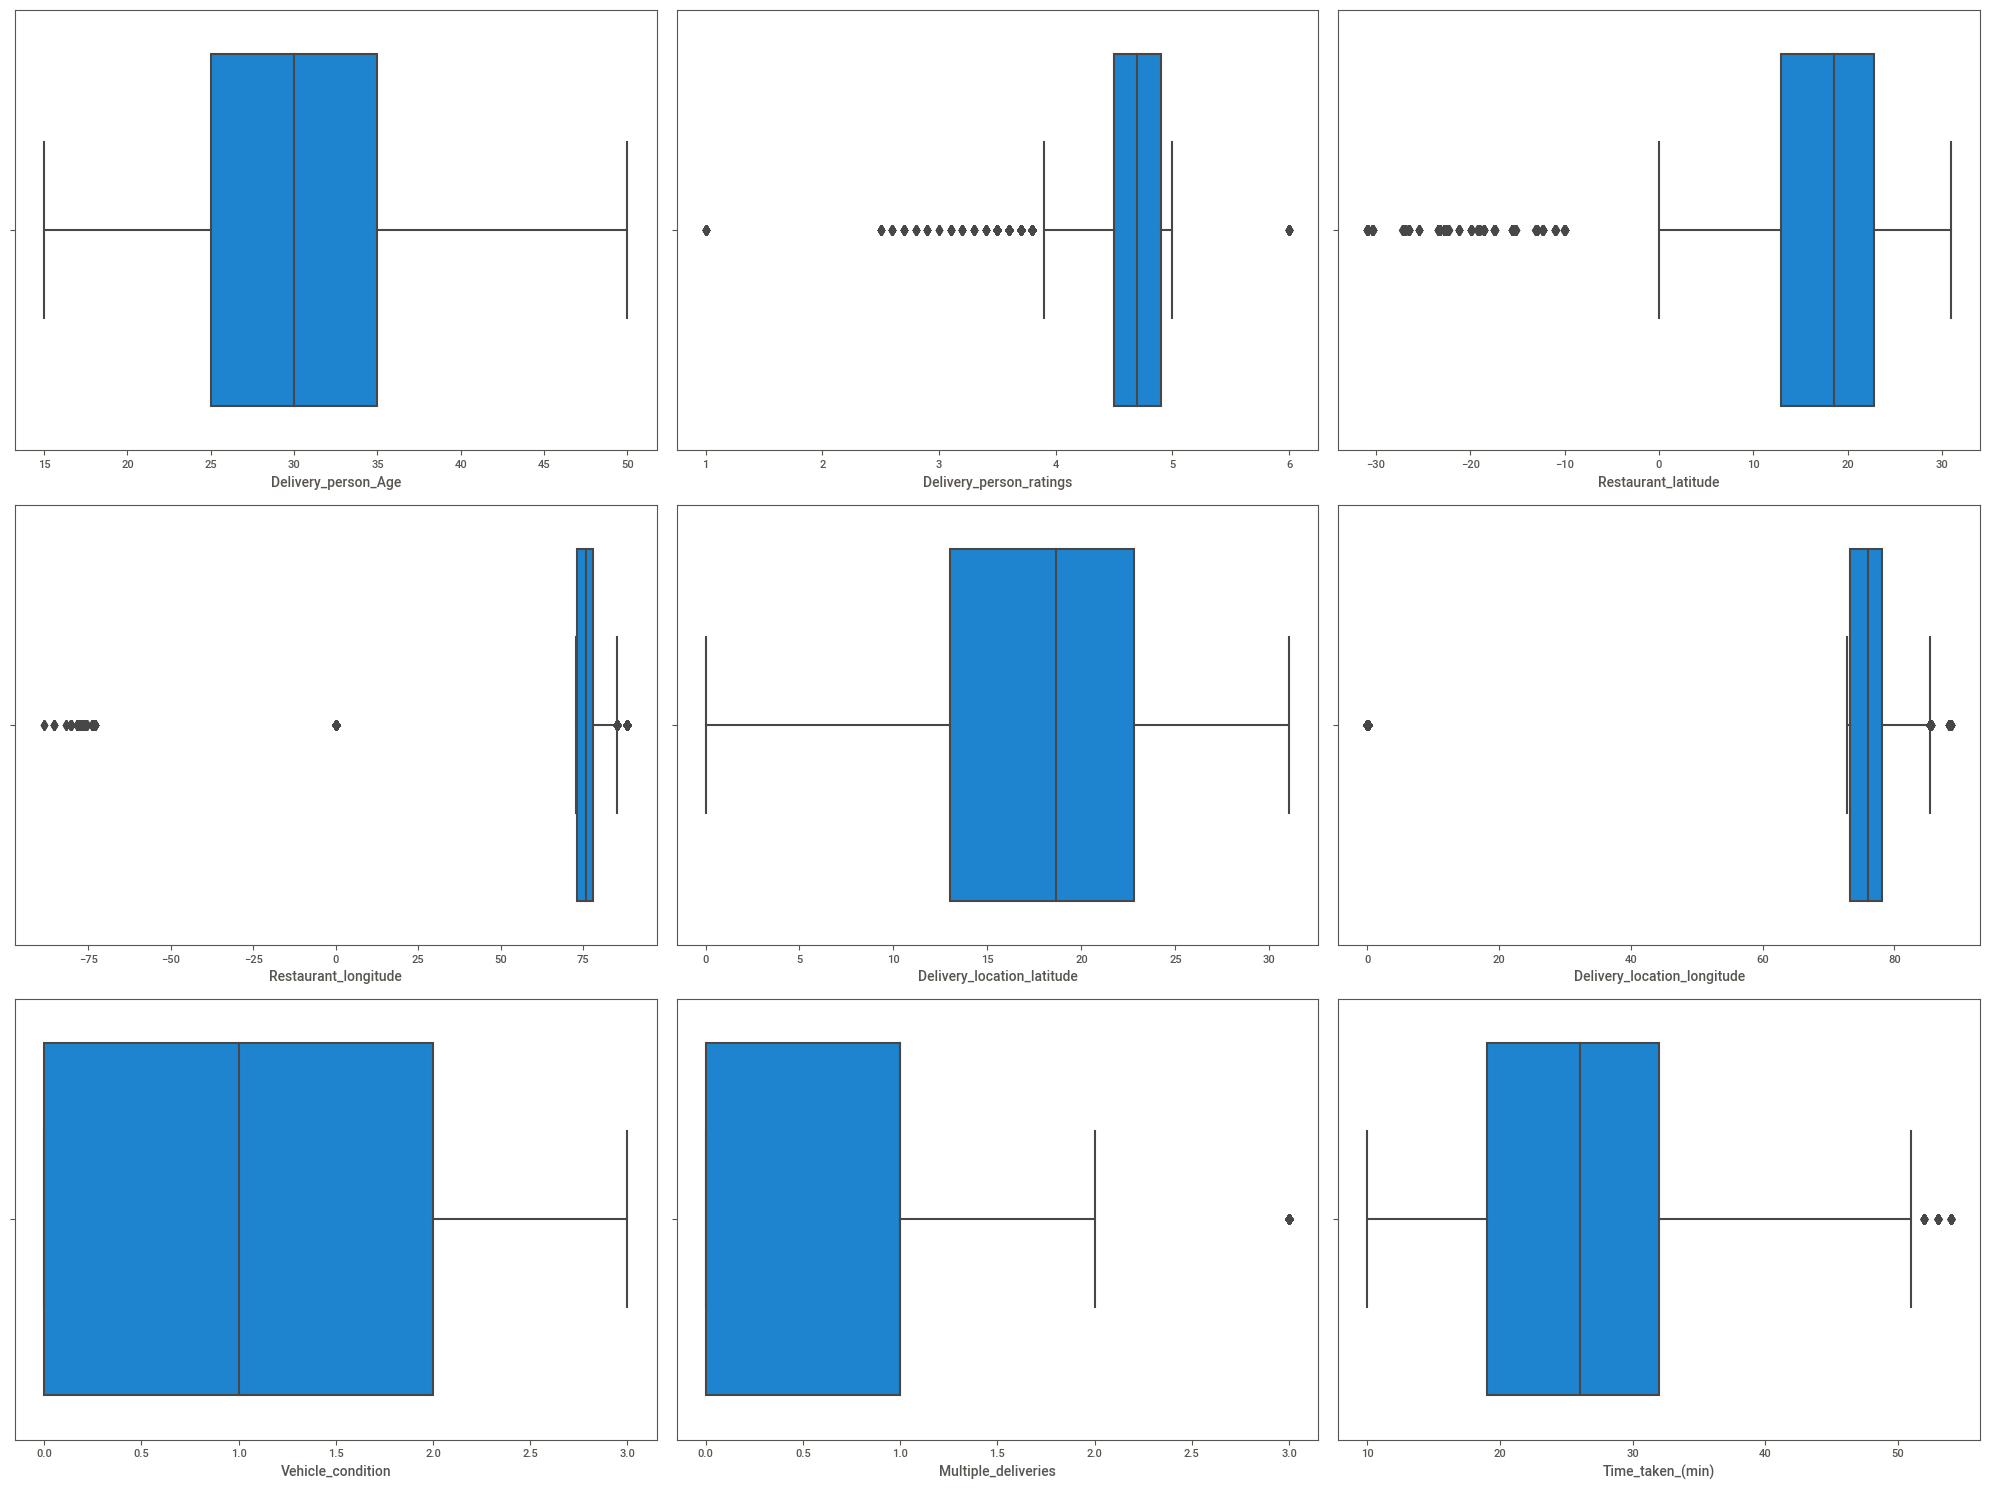

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.boxplot(x=data["Delivery_person_Age"], ax=axes[0,0])
sns.boxplot(x=data["Delivery_person_ratings"], ax=axes[0,1])
sns.boxplot(x=data["Restaurant_latitude"], ax=axes[0,2])
sns.boxplot(x=data["Restaurant_longitude"], ax=axes[1,0])
sns.boxplot(x=data["Delivery_location_latitude"], ax=axes[1,1])
sns.boxplot(x=data["Delivery_location_longitude"], ax=axes[1,2])
sns.boxplot(x=data["Vehicle_condition"], ax=axes[2,0])
sns.boxplot(x=data["Multiple_deliveries"], ax=axes[2,1])
sns.boxplot(x=data["Time_taken_(min)"], ax=axes[2,2])
plt.tight_layout()
plt.show()

# Shape of data

In [24]:
data.skew(numeric_only=True)

Delivery_person_Age            0.018710
Delivery_person_ratings       -2.493534
Restaurant_latitude           -1.361552
Restaurant_longitude          -3.220115
Delivery_location_latitude    -0.701032
Delivery_location_longitude   -2.956343
Vehicle_condition              0.071898
Multiple_deliveries            0.324659
Time_taken_(min)               0.485931
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_1240\1134466390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

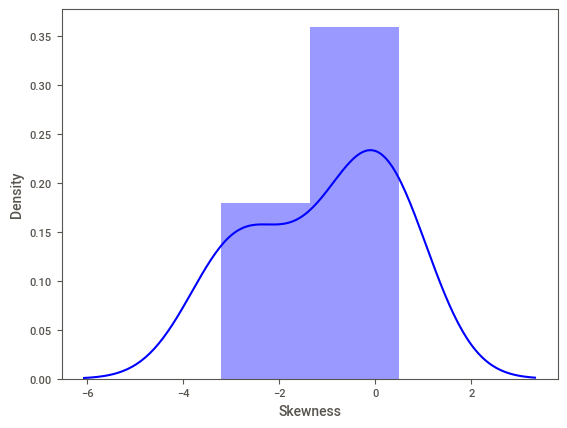

In [25]:
sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')

In [26]:
data.kurt(numeric_only=True)

Delivery_person_Age            -1.058291
Delivery_person_ratings        15.670627
Restaurant_latitude             3.713624
Restaurant_longitude           10.302713
Delivery_location_latitude      0.264299
Delivery_location_longitude     7.104193
Vehicle_condition              -1.314971
Multiple_deliveries             0.909204
Time_taken_(min)               -0.310860
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_1240\2935931933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

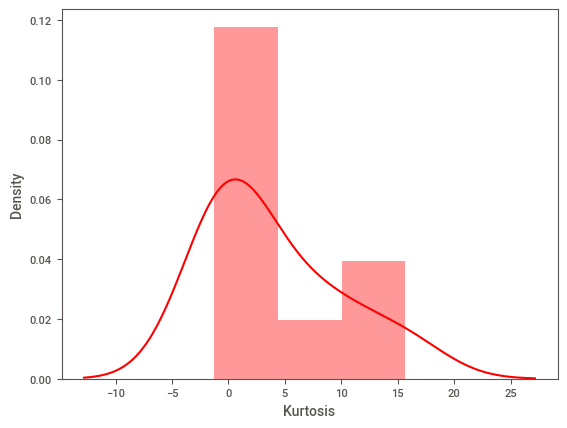

In [27]:
sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

# Correlation

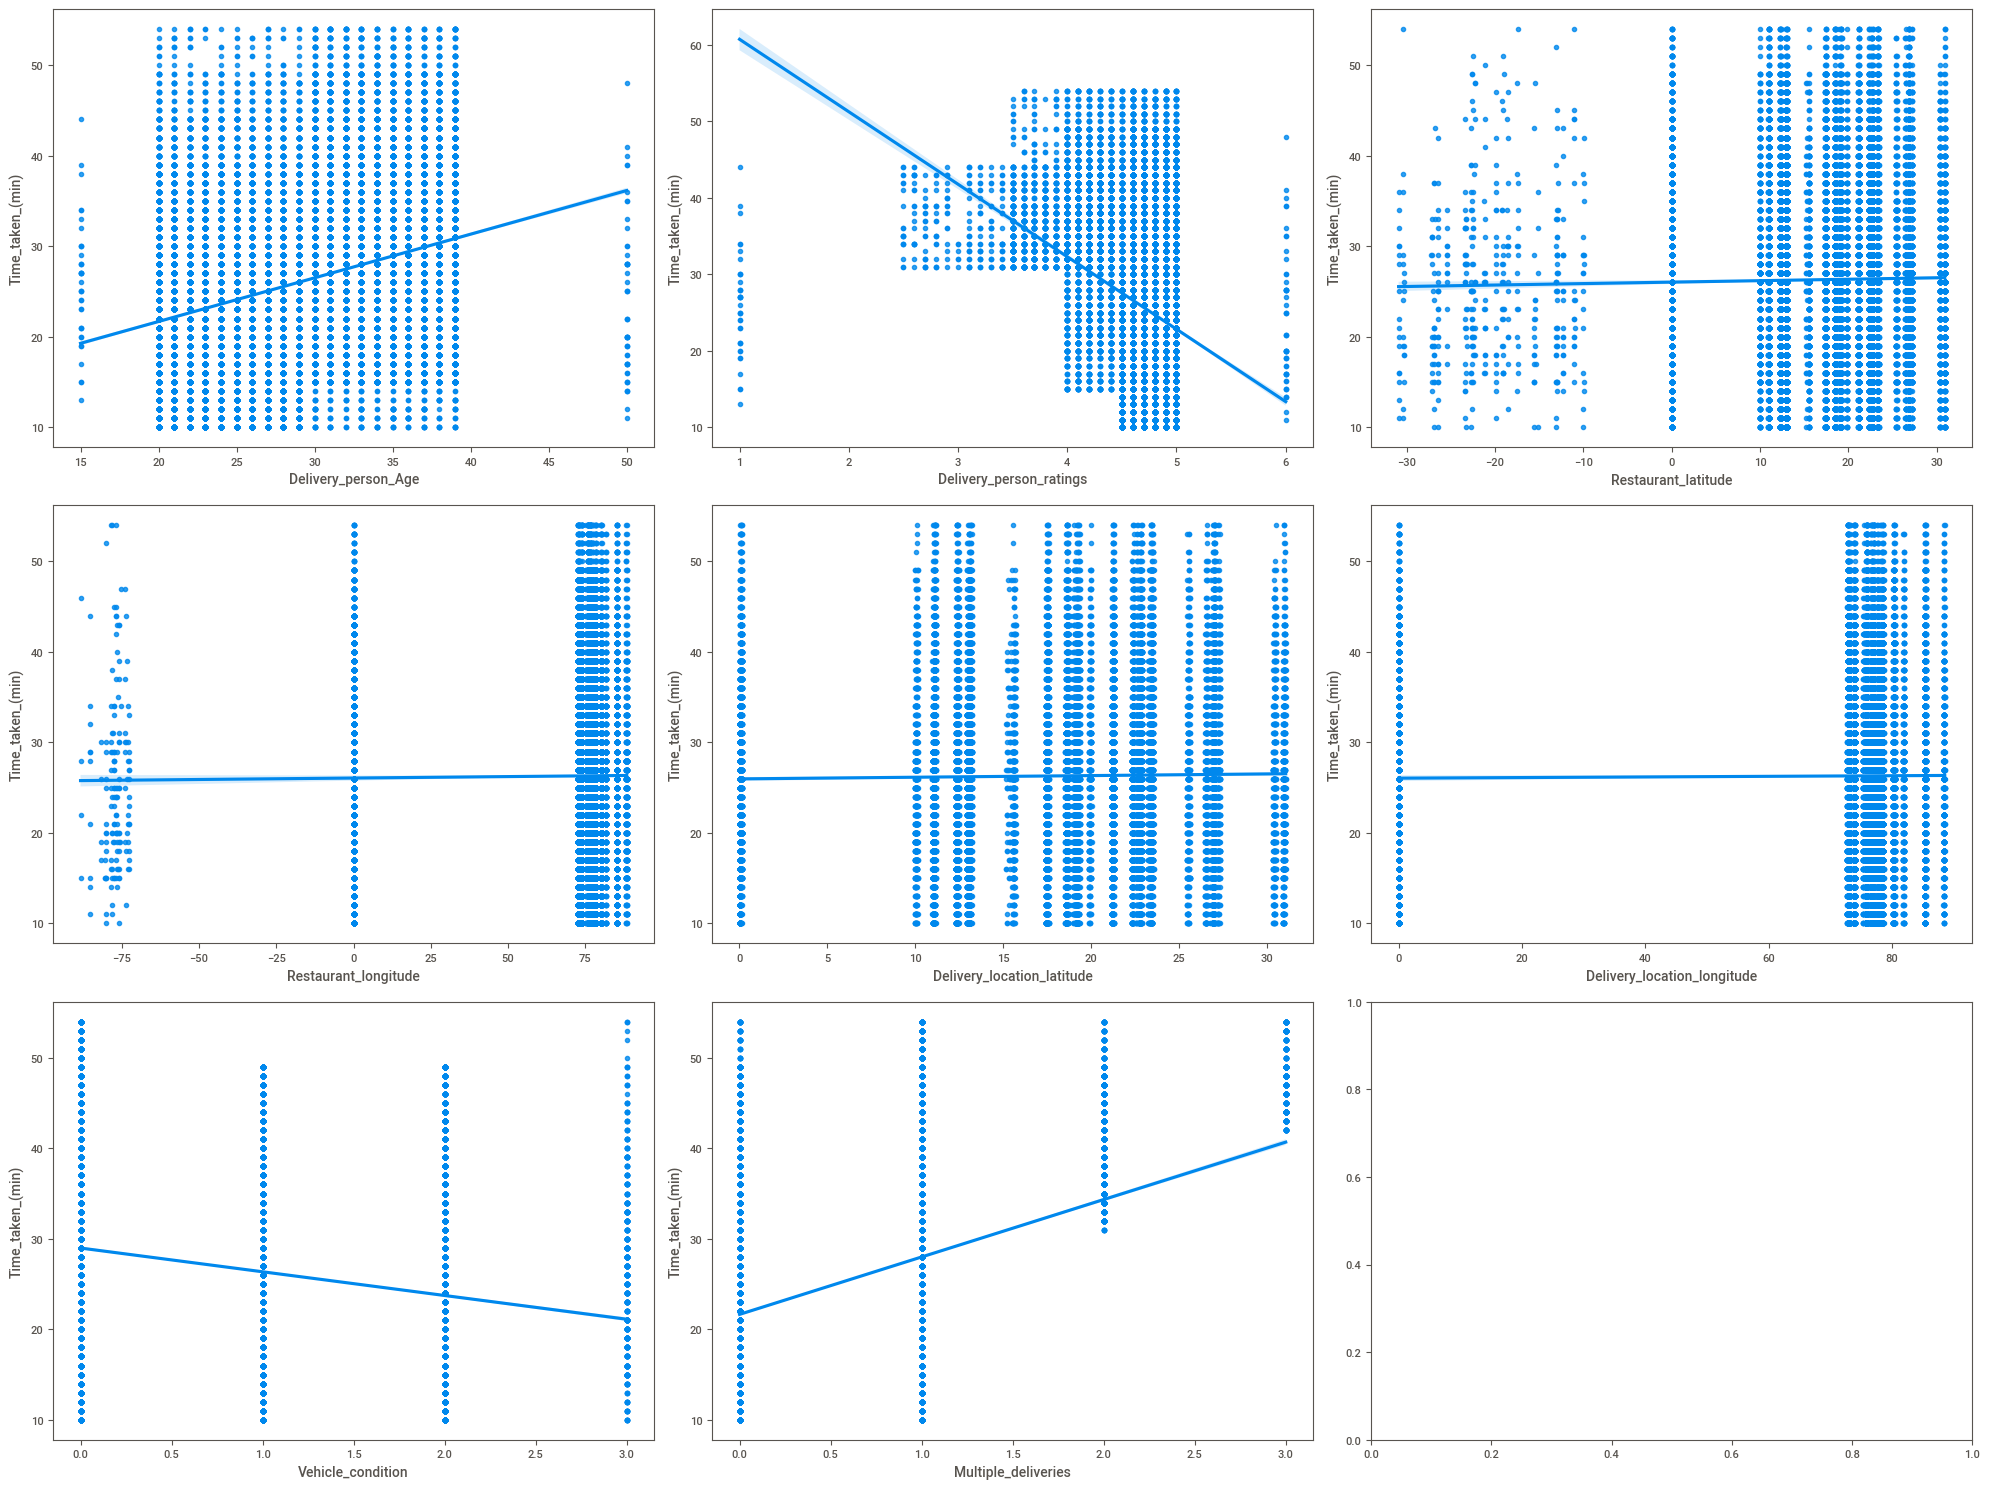

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Vehicle_condition"], y=data["Time_taken_(min)"], ax=axes[2,0])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,1])
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Correlation of Features with Time Taken'}>

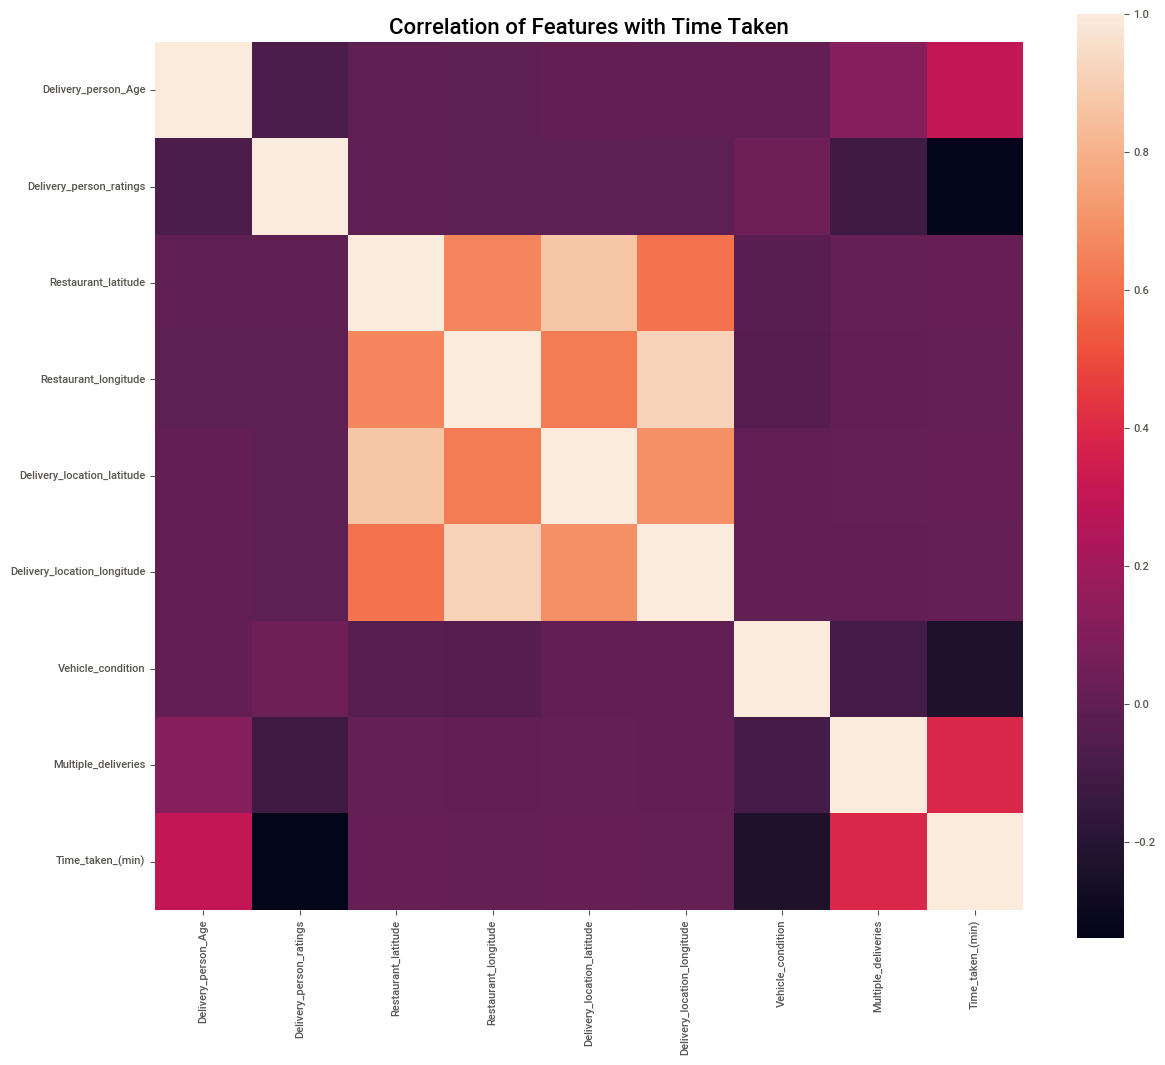

In [29]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features with Time Taken',y=1,size=16)
sns.heatmap(data.corr(numeric_only=True),square = True,  vmax=1)

In [30]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.387051
Delivery_person_Age            0.299487
Delivery_location_latitude     0.014247
Restaurant_latitude            0.013984
Restaurant_longitude           0.007823
Delivery_location_longitude    0.007626
Vehicle_condition             -0.234395
Delivery_person_ratings       -0.338788
Name: Time_taken_(min), dtype: float64 



# Check for missing values

In [31]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_date                        0
Time_order                     1731
Time_order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_(min)                  0
dtype: int64

# Visualizing the missing values

<AxesSubplot:>

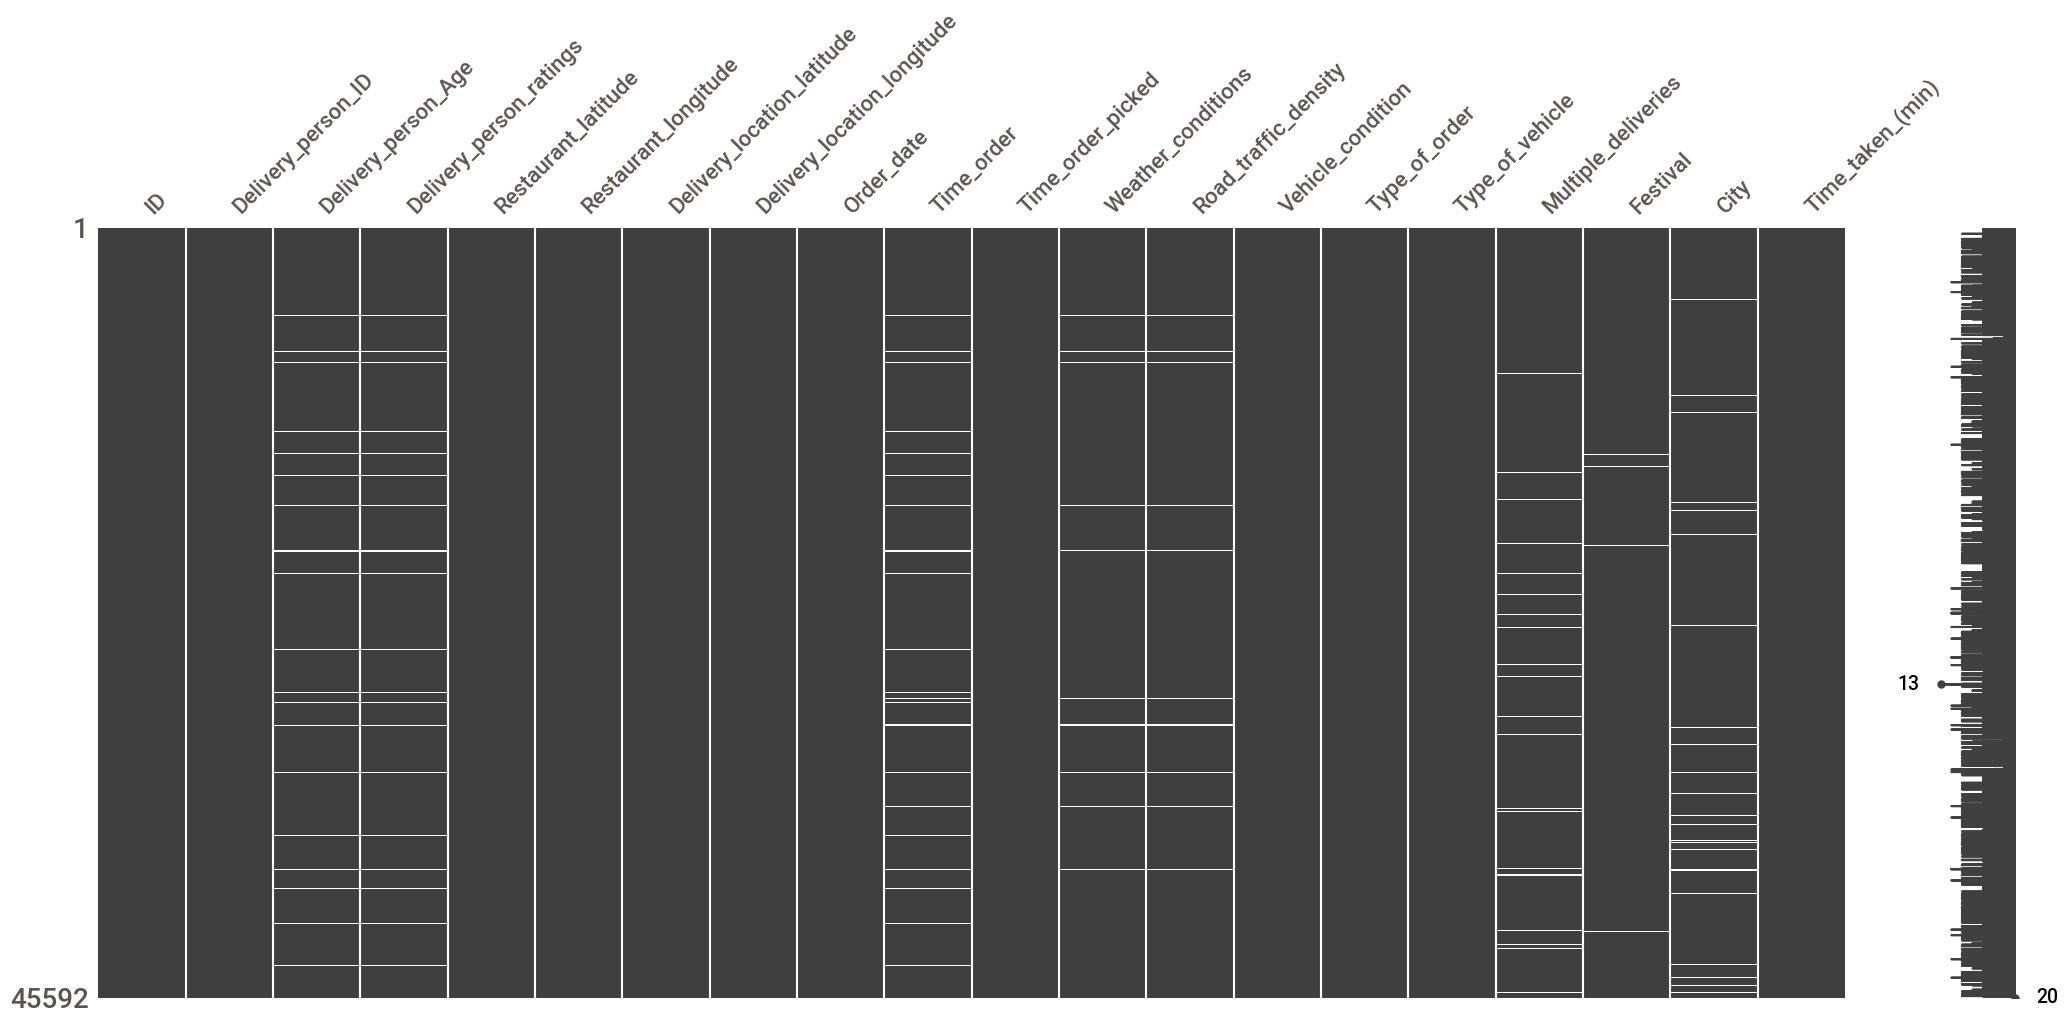

In [32]:
msno.matrix(data)

<AxesSubplot:>

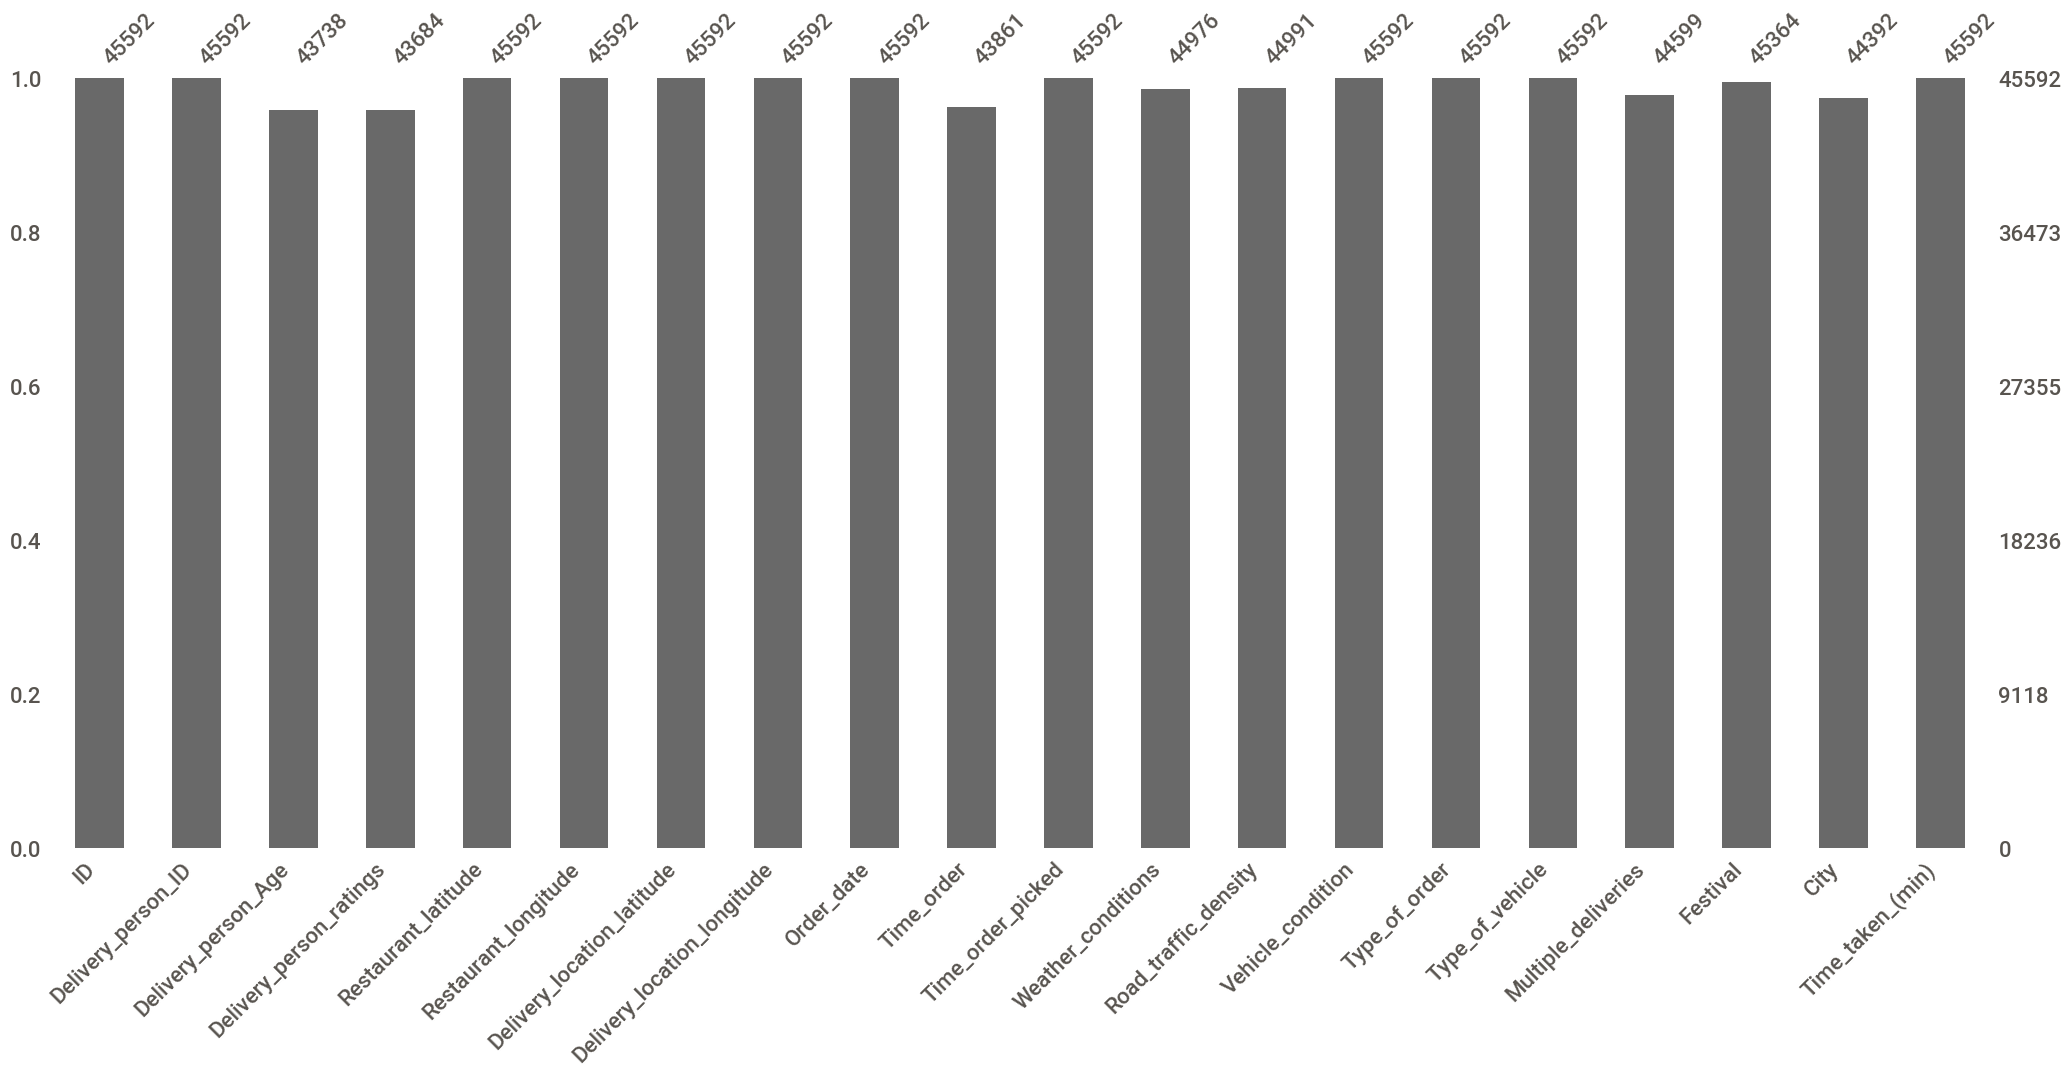

In [33]:
msno.bar(data)

<AxesSubplot:>

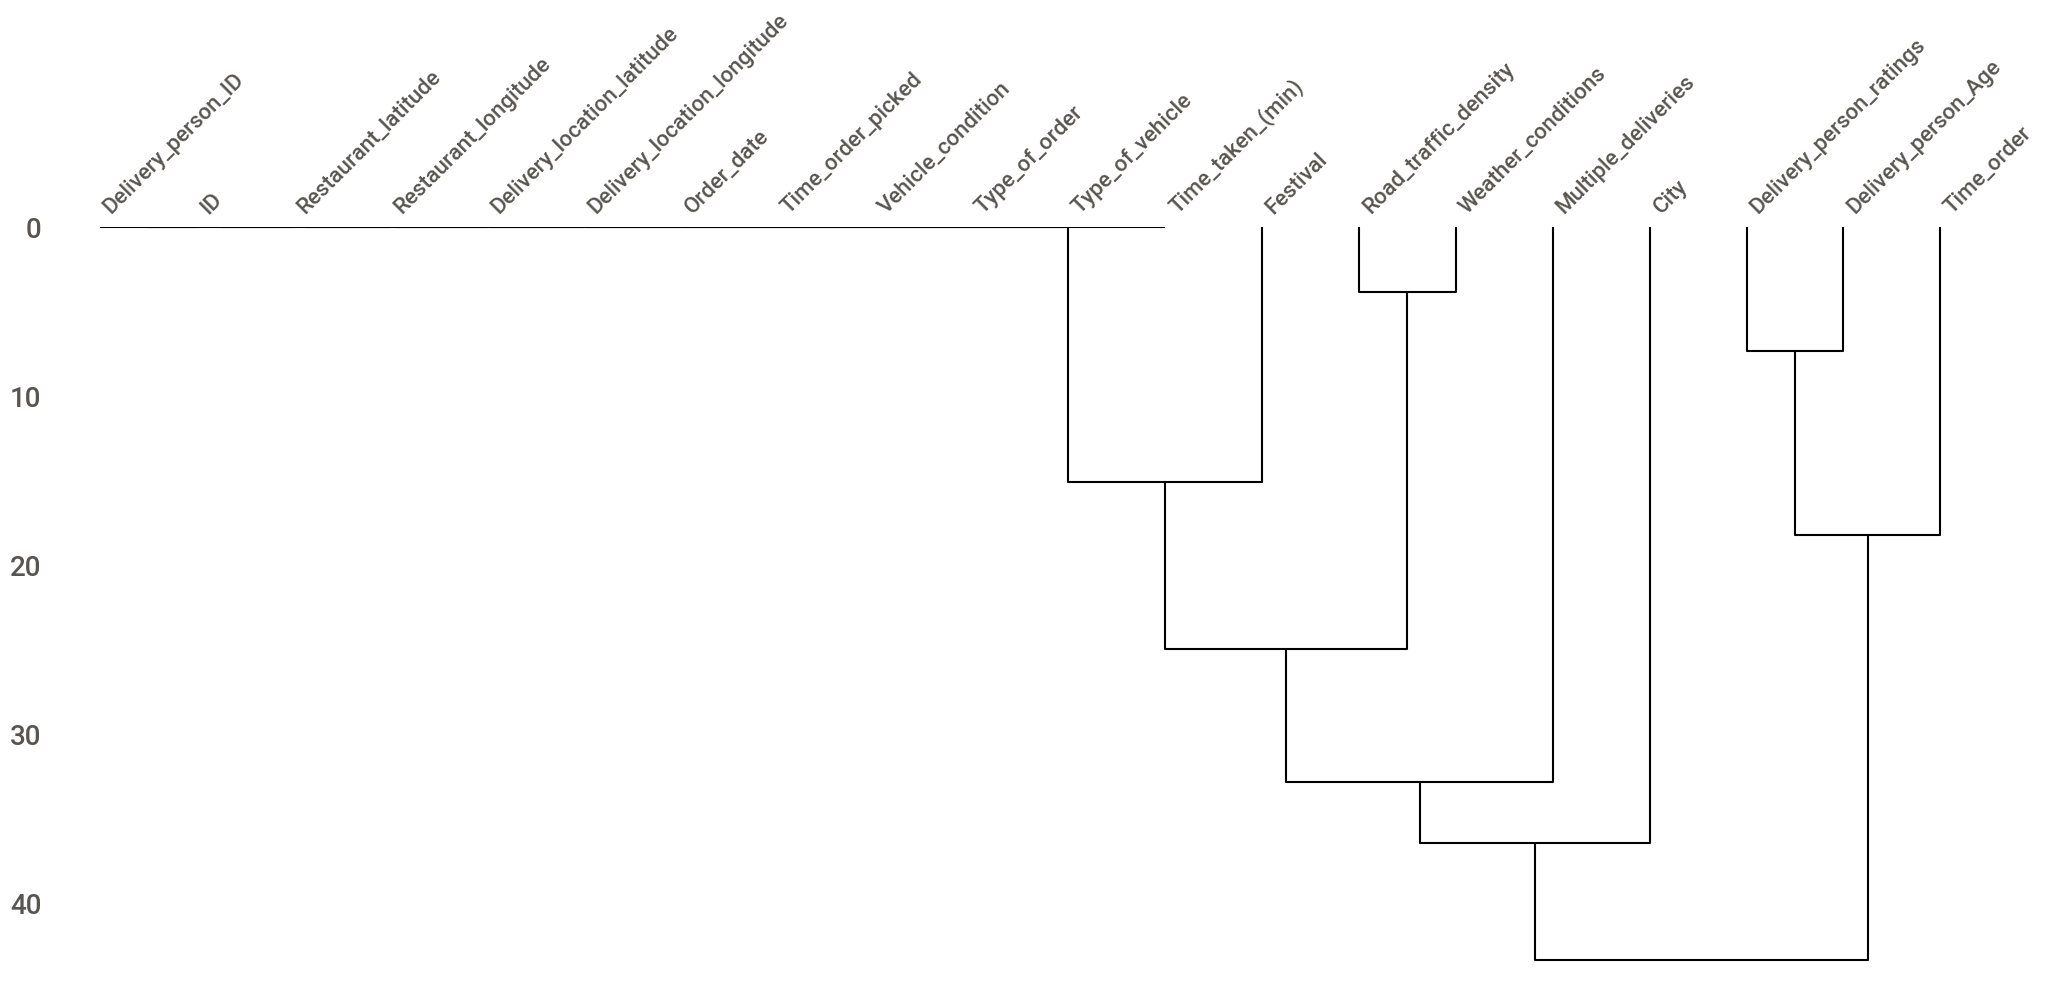

In [34]:
msno.dendrogram(data)

# Group By

In [35]:
categorical_features.columns

Index(['ID', 'Delivery_person_ID', 'Order_date', 'Time_order',
       'Time_order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [36]:
data_gb = data[["Order_date", "Type_of_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Order_date", "Type_of_order"], as_index=False).mean()

data_groupby

,Order_date,Type_of_order,Time_taken_(min)
0,01-03-2022,Buffet,22.797101
1,01-03-2022,Drinks,22.657244
2,01-03-2022,Meal,24.409420
3,01-03-2022,Snack,23.072131
4,01-04-2022,Buffet,23.097656
...,...,...,...
171,30-03-2022,Snack,22.658863
172,31-03-2022,Buffet,28.700855
173,31-03-2022,Drinks,28.277992
174,31-03-2022,Meal,30.334783


In [37]:
data_pivot = data_groupby.pivot(index="Order_date", columns="Type_of_order")
data_pivot

Time_taken_(min)                                 
Type_of_order           Buffet     Drinks       Meal      Snack
Order_date                                                     
01-03-2022           22.797101  22.657244  24.409420  23.072131
01-04-2022           23.097656  23.727891  23.419580  23.202020
02-03-2022           28.446565  29.570850  30.170124  29.900763
02-04-2022           28.995413  29.800000  29.995935  29.980620
03-03-2022           22.412214  23.267361  23.321981  23.129964
03-04-2022           23.216783  22.906250  22.759740  23.429054
04-03-2022           29.121569  29.713043  30.186312  29.257511
04-04-2022           29.318898  29.328704  29.553191  29.326271
05-03-2022           23.427562  23.035088  23.242215  22.636364
05-04-2022           23.581560  23.642623  23.014134  22.613240
06-03-2022           29.333333  29.564103  31.075697  30.209738
06-04-2022           29.903226  29.805195  29.670782  29.188285
07-03-2022           23.527076  23.472603  22.358804  22.685512
08-03-2022           29.638298  30.375000  30.259843  29.250965
09-03-2022           23.463768  23.197987  24.461255  22.668790
10-03-2022           30.427984  29.709163  30.775281  29.893617
11-02-2022           23.377193  24.120332  22.920635  23.289157
11-03-2022           23.874172  23.297872  22.929766  23.127820
12-02-2022           31.162437  29.657895  29.816514  29.746606
12-03-2022           30.695122  28.890756  29.128205  29.479675
13-02-2022           23.324895  23.530612  23.440171  23.128631
13-03-2022           23.429487  23.326241  23.249110  23.401361
14-02-2022           29.445545  30.098039  30.581081  30.067265
14-03-2022           30.352174  30.333333  29.580087  30.424242
15-02-2022           22.814516  23.507042  22.821138  24.092437
15-03-2022           23.598684  23.185965  23.072607  23.753333
16-02-2022           29.768908  30.123656  30.433673  30.834025
16-03-2022           29.710145  30.223140  29.922747  29.446721
17-02-2022           23.392405  23.995633  23.037190  23.584416
17-03-2022           23.389937  22.992883  23.257353  23.106464
18-02-2022           30.616438  29.630769  29.578199  28.882609
18-03-2022           30.153846  30.580153  30.656652  29.598326
19-03-2022           22.755556  23.200000  23.867133  22.672355
20-03-2022           30.441964  29.167883  29.987805  31.072000
21-03-2022           23.440789  24.218121  23.103704  23.696751
23-03-2022           30.385281  29.686275  30.241525  30.157025
24-03-2022           23.203175  22.233333  22.690972  23.335640
25-03-2022           29.318777  29.035874  30.636719  29.471910
26-03-2022           23.374101  22.860068  23.232026  23.114187
27-03-2022           29.606557  27.874477  30.694118  30.079295
28-03-2022           23.607639  23.174658  23.533557  23.314176
29-03-2022           29.818584  29.731092  30.047244  30.656371
30-03-2022           23.809160  23.546392  23.422145  22.658863
31-03-2022           28.700855  28.277992  30.334783  29.856557

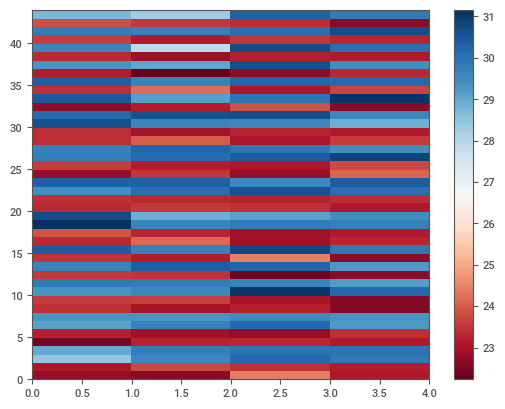

In [38]:
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Phân tích ANOVA

In [39]:
data_anova = data[["Type_of_order","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_order'])
anova_result = stats.f_oneway(grouped_anova.get_group('Buffet')['Time_taken_(min)'],
                              grouped_anova.get_group('Drinks')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=0.5895688433909704, pvalue=0.4425939149055699)